# Intro to Data Analysis and Visualization

Welcome to the course! In this lesson, we will provide a sample of the kinds of techniques and analyses we'll be doing in this course. Data (plural! singular is datum) always have some story to tell and data science is the art of bringing that story to life. In many ways, this course will teach you various narrative techniques. You'll learn how to summarize key facts about the structure of your data, how to understand relationships within your data, and how to extrapolate information about unseen data. Here, you'll be able to play around with some data visualizations to discover some insights for yourself. Below, you can see the first couple rows of the data.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
mpg_dataset = sns.load_dataset('mpg')
mpg_dataset.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


Each row in the dataset describes a particular car. Each column in the dataset describes a characteristic of that particular car. MPG stands for "miles per gallon" i.e. it is the answer to the question "How many miles can the given car travel for one gallon of fuel?" We can take a look at the first 10 rows of the dataset as follows.



# Comparing American and Japanese Cars
A technique you will soon learn is how to manipulate datasets to obtain particular categories and pieces of information about those categories. Suppose for instance that we wanted to compare the fuel efficiency of Japanese cars and American cars. One way to do so would be to compute the **median** for each category and compare these medians using a bar graph.

In [0]:
def compare_medians(var):
  sns.barplot(x='origin', y=var, data=mpg_dataset, order=['japan', 'usa'], estimator=np.median)
compare_medians('mpg')

NameError: ignored

We can see that (at least among the cars in this dataset) the median MPG in Japan is much higher than the median MPG in the USA i.e. that Japanese cars are in general more fuel efficient.

# Exercise
Compare American and Japanese cars along other variables e.g. weight, acceleration etc. What else do you notice?

Please enter a variable to compare between American and Japanese carsdisplacement


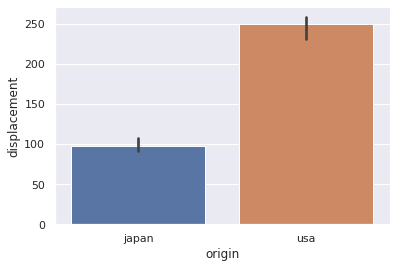

In [0]:
var = input('Please enter a variable to compare between American and Japanese cars').replace(' ','')
compare_medians(var)


# Looking at the Spread of Data

It is often helpful to understand how spread out our data are. Are all the data clustered around particular values? Are there outliers? (values that are far from the rest of the data?) Are their multiple peaks in the distribution? Let's take a look at all of the fuel efficiency data:

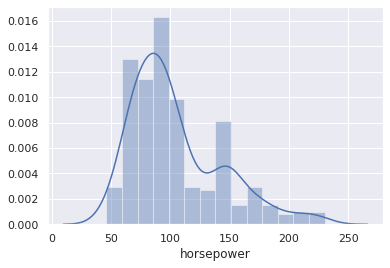

In [0]:
sns.distplot(mpg_dataset['horsepower'])

It appears that most of the data is clustered around the 20-30 range and there are some values at the ends ('"tails"') of the distribution.

# Exercise
Look at the values of other variables. How do their distributions compare to the one above?

In [0]:
var = input('What variable would you like to see the distribution of? : ')
# Filter out NaN Values: https://stackoverflow.com/questions/944700/how-can-i-check-for-nan-values
sns.distplot(mpg_dataset[mpg_dataset[var] == mpg_dataset[var]][var])


# Understanding Relationships in Data
Scatter plots provide us a very useful way of visualizing the relationship between different variables. For instance, say we wanted to understand the relationship between fuel efficiency and the weight of a car. We might guess that fuel efficiency goes down the heavier a car becomes since more fuel is required to move more weight. The following will let us know if our hunch is right:

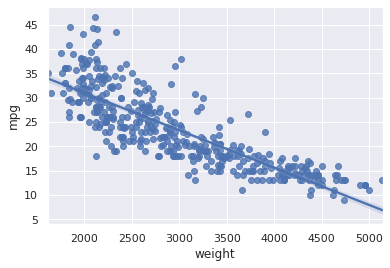

In [0]:
sns.regplot(x="weight", y="mpg", data=mpg_dataset)

Indeed we see a **negative correlation** between weight and mpg -- the higher the weight is, the lower the mpg is. The reasoning behind the guess above seems plausible, however it is important to remember that **correlation does not imply causation**. For instance, if we might notice a positive correlation between ice cream sales and wildfires in a particular place i.e. the more ice cream is sold, the more wildfires there are.

Why might this be? Our first assumption shouldn't be something along the lines of ice cream being flammable... a far more likely reason is that people buy more ice cream when it's hot out and there are more wildfires when it's hot out. The weather is a **hidden variable** -- it is always important to control for hidden variables when performing any kind of data analysis.

In case you're wondering about the reasoning earlier concerning weight an fuel efficiency, it turns out to be valid and you're welcome to read more about it [here](https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/pdf/transportation/fuel-efficient-technologies/autosmart_factsheet_16_e.pdf).



# Exercise
Choose some other pairs of variables and make some predictions about how they relate to one another. Verify your predictions by plotting scatter plots of these varaibles.

Please enter a comma separated pair of variable names to plot: mpg, weight


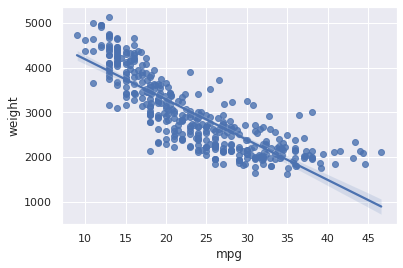

In [0]:
var1, var2 = input('Please enter a comma separated pair of variable names to plot: ').replace(' ','').split(',')
sns.regplot(x=var1, y=var2, data=mpg_dataset)

In [0]:
np.polyfit